In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Objective

> 다양한 Activation Map의 개형을 파악해보자 


다룰 Activation functions

* 계단함수
* sigmoid 함수
* Hyperbolic Tangent 함수
* RELU 함수
* Leaky RELU 함수

## 1. 계단 함수

가장 기본적인 Activation Function

$$
f(x) =
\begin{cases}
 1, &\mbox{if }n>0 \\
 0, &\mbox{if }n \leqq 0 \\
\end{cases}
$$

In [2]:
def step_activation(x):
    """
    Threshold Activation Function
    """
    out = tf.where(x>0, tf.ones(tf.shape(x)),
                        tf.zeros(tf.shape(x)))
    return out

In [3]:
h = np.linspace(-1,1,50)

graph = tf.Graph()
with graph.as_default():
    X = tf.constant(h, dtype=tf.float32)
    y = step_activation(X)

with tf.Session(graph=graph) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    activation_out = sess.run(y)

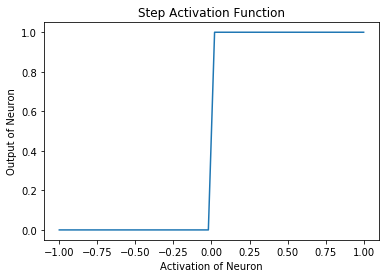

In [4]:
# Activation 그림 그리기
plt.plot(h, activation_out)
plt.title('Step Activation Function')
plt.xlabel('Activation of Neuron')
plt.ylabel('Output of Neuron')
plt.show()

### Sigmoid Activation Function

Deep Learning 연구 초기에 많이 쓰던 Activation Function으로, Step Activation과 달리, 모든 점에서 기울기를 구할 수가 있다. (Step activation은 0에서 기울기를 구할 수 없음)
$$
f(x) = \frac{1}{1+e^{-x}}
$$

In [5]:
h = np.linspace(-10,10,50)

graph = tf.Graph()
with graph.as_default():
    X = tf.constant(h, dtype=tf.float32)
    y = tf.nn.sigmoid(X)

with tf.Session(graph=graph) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    activation_out = sess.run(y)

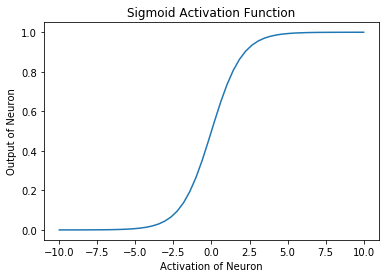

In [6]:
# Activation 그림 그리기
plt.plot(h, activation_out)
plt.title('Sigmoid Activation Function')
plt.xlabel('Activation of Neuron')
plt.ylabel('Output of Neuron')
plt.show()

## Hyperbolic tagent activation function

위의 두 함수는 모두 출력이 0~1의 범위를 가지고 있다. HyperBolic은 0을 중심으로 -1~1까지의 범위를 가진 함수이다.
$$
f(x) = \frac{1-e^{-2x}}{(1+e^{-2x})}
$$

In [7]:
h = np.linspace(-10,10,50)

graph = tf.Graph()
with graph.as_default():
    X = tf.constant(h, dtype=tf.float32)
    y = tf.tanh(X)

with tf.Session(graph=graph) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    activation_out = sess.run(y)

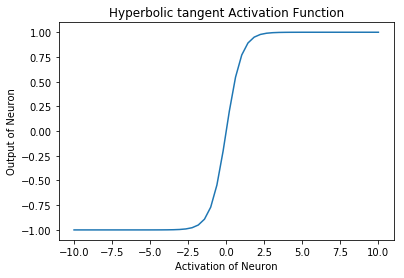

In [8]:
# Activation 그림 그리기
plt.plot(h, activation_out)
plt.title('Hyperbolic tangent Activation Function')
plt.xlabel('Activation of Neuron')
plt.ylabel('Output of Neuron')
plt.show()

## Relu

Neural Network가 발전하지 못한 4가지의 이유(Geoffrey Hinton)

* our labeled datasets were thousands of times too small.
* our computers were millions of times too slow.
* we initialized the weights in a stupid way.
* we used the wrong type of non-linearity.

![image.png](https://t1.daumcdn.net/cfile/tistory/221E5750579F7BBD1B)

sigmoid 함수나 Hyperbolic tangent 함수의 경우에는, 값이 끝으로 갈수록 기울기가 점점 줄어든다. 이로 인해, Layer의 Depth가 깊어질수록 Gradient가 소실되는 Vanishing gradient 문제가 발생한다. 이 문제는 1986년부터 2006년까지 해결하지 못한 난제였다. 이 문제를 해결한 것이 바로 relu Activation이다. 

$$
f(x) =
\begin{cases}
 x, &\mbox{if }x>0 \\
 0, &\mbox{if }x \leqq 0 \\
\end{cases}
$$

In [9]:
h = np.linspace(-10,10,50)

graph = tf.Graph()
with graph.as_default():
    X = tf.constant(h, dtype=tf.float32)
    y = tf.nn.relu(X)

with tf.Session(graph=graph) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    activation_out = sess.run(y)

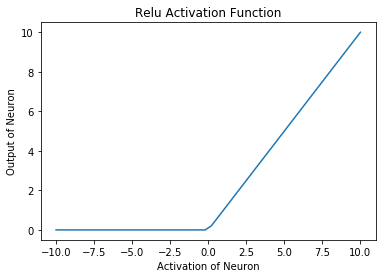

In [10]:
# Activation 그림 그리기
plt.plot(h, activation_out)
plt.title('Relu Activation Function')
plt.xlabel('Activation of Neuron')
plt.ylabel('Output of Neuron')
plt.show()

## (Optional) Leaky RELU

RELU Activation은 Vanishing Gradient 문제를 훌륭히 해결해주지만, 새로운 문제가 발생한다. 바로 Dying RELU로 불리는 문제로, RELU로 Gradient가 지나치게 큰 값이 들어오면, 이후 출력이 0으로 고정되면서, 해당 뉴런은 더 이상 학습이 진행되지 않는 문제가 발생한다. Learning Rate가 너무 커지면 네트워크 내 neuron의 40%가 죽는 경우도 발생한다. 이러한 문제를 해결하기 위해 만들어진 activation이 바로 Leaky RELU

$$
f(\alpha,x) =
\begin{cases}
 x, &\mbox{if }x>0 \\
 \alpha x, &\mbox{if }x \leqq 0 \\
\end{cases}
\\
0<\alpha<1
$$

In [11]:
h = np.linspace(-10,10,50)

graph = tf.Graph()
with graph.as_default():
    X = tf.constant(h, dtype=tf.float32)
    y = tf.nn.leaky_relu(X,alpha=0.2)

with tf.Session(graph=graph) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    activation_out = sess.run(y)

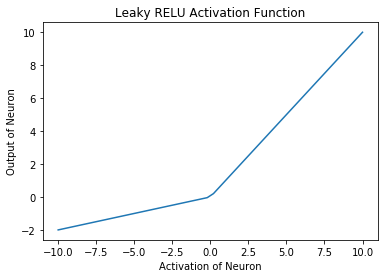

In [12]:
# Activation 그림 그리기
plt.plot(h, activation_out)
plt.title('Leaky RELU Activation Function')
plt.xlabel('Activation of Neuron')
plt.ylabel('Output of Neuron')
plt.show()

In [13]:
h = np.linspace(-10,10,50)

graph = tf.Graph()
with graph.as_default():
    X = tf.constant(h, dtype=tf.float32)
    y = tf.nn.elu(X)

with tf.Session(graph=graph) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    activation_out = sess.run(y)